In [47]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

In [77]:
data = pd.read_csv('train (copy).csv')
data_test = pd.read_csv('test.csv')
data_target = pd.read_csv('test_target.csv')
test = pd.read_csv('test_data.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/04/18/may-fourth-be-w...,630.0,12.0,363.0,0.571823,1.0,0.773585,5.0,3.0,1.0,...,0.033333,1.0,-0.250000,-0.4,-0.150000,0.571429,0.357143,0.071429,0.357143,5100
1,http://mashable.com/2014/05/23/edgar-wright-sh...,230.0,11.0,502.0,0.591919,1.0,0.777778,6.0,1.0,2.0,...,0.100000,0.8,-0.304167,-0.7,-0.050000,0.000000,0.000000,0.500000,0.000000,3100
2,http://mashable.com/2013/01/24/dont-count-appl...,714.0,6.0,951.0,0.433761,1.0,0.658635,22.0,19.0,1.0,...,0.062500,1.0,-0.317357,-1.0,-0.050000,0.000000,0.000000,0.500000,0.000000,1300
3,http://mashable.com/2014/08/09/8-ice-cream-rec...,151.0,9.0,496.0,0.569072,1.0,0.712934,10.0,3.0,1.0,...,0.050000,0.6,-0.188542,-0.4,-0.050000,0.000000,0.000000,0.500000,0.000000,1400
4,http://mashable.com/2013/01/11/marlon-wayans-h...,727.0,8.0,148.0,0.721088,1.0,0.865979,6.0,2.0,0.0,...,0.033333,1.0,-0.116667,-0.2,-0.033333,0.750000,0.800000,0.250000,0.800000,1000


In [78]:
#Normalizando os dados e diminuindo a base
data3 = data[data.shares < 70000]

# data3 = (data3 / (data3.max() - data3.min()))
# data3 = ((data3 - data3.mean()) / data3.mean())

X3 = data3.iloc[:,2:3] 
cols = data3.shape[1]
y3 = data3.iloc[:,cols-1:cols]
X3.insert(0, 'Ones', 1)
print(X3.shape)
# convert to matrices and initialize theta
X3 = np.matrix(X3.values)
y3 = np.matrix(y3.values)

(31628, 2)


In [79]:
from numpy.linalg import inv
def get_best_param(X3, y3):  
    X_transpose = X3.T
    best_params = inv(X_transpose.dot(X3)).dot(X_transpose).dot(y3) 
    # normal equation  
    # theta_best = (X.T * X)^(-1) * X.T * y  
    return best_params # returns a list 

In [80]:
params = get_best_param(X3, y3)

In [81]:
prediction = X3.dot(params)
prediction

matrix([[3011.35058398],
        [2996.17548851],
        [2920.30001117],
        ...,
        [3011.35058398],
        [3011.35058398],
        [2996.17548851]])

In [82]:
error = (prediction.sum() - y3.sum()) / len(y3)
error

-7.067074045393792e-12

In [83]:
# test prediction  aqui ao invés de jogar X2 mesmo, tem que jogar
# a propria base de teste. e no final medir com o resultado do Y de TESTE
# para saber se acertou mesmo ou nao.

#predict = g2 * x_test
data3 = data[data.shares < 70000]

test_x = test.iloc[:,2:3]
test_x.insert(0, 'Ones', 1)
cols = test.shape[1]
test_y = test.iloc[:,cols-1:cols] 

# convert to matrices and initialize theta
test_x = np.matrix(test_x.values)
test_y = np.matrix(test_y.values)
# print(test_y)

In [84]:
prediction = test_x.dot(params)
prediction

matrix([[2935.47510664],
        [2981.00039304],
        [2981.00039304],
        ...,
        [2996.17548851],
        [2905.1249157 ],
        [2981.00039304]])

In [85]:
error = (prediction.sum() - test_y.sum()) / len(test_y)
error

-532.6266267714316

(7929, 1)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

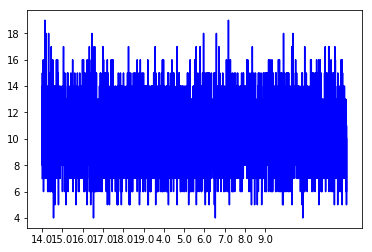

In [96]:
# Plotting Values and Regression Line
test_x = test.iloc[:,2:3]
print(test_x.shape)
max_x = np.max(test_x)
min_x = np.min(test_x)

# Calculating line values x and y
#faz alguma coisa
x = np.linspace(min_x, max_x, 7929)
y = test_x

# Ploting Line
plt.plot(x, y, color='b', label='Regression Line')
# Ploting Scatter Points
plt.scatter(test_x, test_y, c='r', label='Scatter Plot')

plt.xlabel('kw_avg_avg')
plt.ylabel('shares')
plt.legend()
plt.show()